In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv("medical_cost.csv") #load the dataset
data

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,3,no,northwest,10600.54830
1334,1335,18,female,31.920,0,no,northeast,2205.98080
1335,1336,18,female,36.850,0,no,southeast,1629.83350
1336,1337,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   int64  
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 83.8+ KB


In [ ]:
data = data.drop(['Id', 'sex', 'region'], axis=1)
data

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830
1334,18,31.920,0,0,2205.98080
1335,18,36.850,0,0,1629.83350
1336,21,25.800,0,0,2007.94500


In [ ]:
data.describe()

,age,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,13270.422265
std,14.049960,6.098187,1.205493,0.403694,12110.011237
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,53.130000,5.000000,1.000000,63770.428010


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

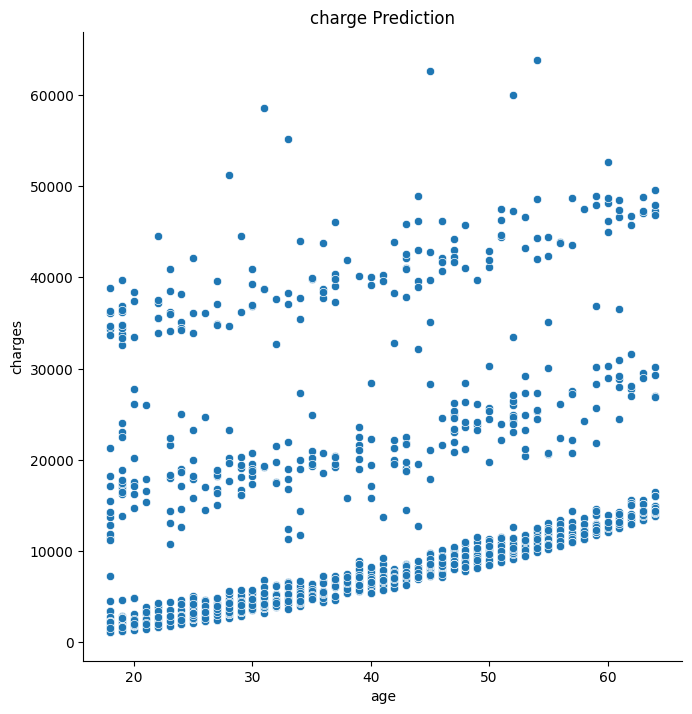

In [ ]:
plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['age'],y_vars=['charges'],size=7,kind='scatter')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('charge Prediction')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = data[['age', 'bmi', 'children', 'smoker']]
y = data['charges']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)
print(X_train.shape)
print(X_test.shape)

(936, 4)
(402, 4)


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predict = lr_model.predict(X_test)
y_predict

array([ 4.82351700e+03,  5.12728639e+03,  8.40081531e+03,  3.22703983e+03,
        2.49436801e+04,  3.73457610e+04,  1.45595129e+04,  2.82115979e+03,
        3.00574586e+04,  1.58006051e+04,  1.51660005e+04,  5.20131171e+03,
        1.09661567e+04,  4.28400480e+03,  9.83221387e+03,  3.23357465e+04,
        1.19976629e+04,  1.31895872e+04,  7.31802125e+03,  1.79899458e+04,
        1.42142607e+04,  3.38673223e+03,  6.91776298e+03,  3.19423408e+04,
        1.36506169e+04,  3.23732329e+04,  6.40999613e+03,  3.96906630e+04,
        3.22285051e+04,  1.37088200e+04,  1.80965703e+04,  2.48349632e+03,
        3.92767717e+04,  2.67657092e+04,  8.91148767e+03,  1.21340790e+04,
        8.33463932e+03,  3.28491263e+04,  4.15685935e+03,  3.88165547e+04,
        8.34943095e+03,  1.21452468e+04,  5.65685873e+03,  8.44433715e+03,
        9.34137668e+02,  5.64089735e+03,  5.82408165e+03,  3.94838480e+03,
        2.29340128e+03,  1.10365515e+04,  1.71790183e+04,  8.09313045e+03,
        5.16044434e+03,  

In [ ]:
train_accuracy = lr_model.score(X_train, y_train)
train_accuracy

0.7358069665177005

In [ ]:
test_accuracy = lr_model.score(X_test, y_test)
test_accuracy

0.7801257218275262

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print('Mean absolute error = ', mean_absolute_error(y_test,y_predict))
print('Mean square error = ', mean_squared_error(y_test,y_predict))
print('R2 Score = ', r2_score(y_test,y_predict))

Mean absolute error =  3895.874830171531
Mean square error =  31925237.256545257
R2 Score =  0.7801257218275262


Polynomial Regression


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree =2)
x_train_poly= poly.fit_transform(X_train)
x_test_poly= poly.fit_transform(X_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [ ]:
predict_train_poly = model.predict(x_train_poly)
predict_train_poly

array([26704.8515583 , 10681.03741807,  7736.23081159,  4805.975771  ,
        8481.3255505 , 29454.08929604, 15317.30889233,  9937.0639915 ,
        8853.03835174, 11436.55643923, 39445.80678056,  6668.41894201,
       10728.14576475,  3974.07194332,  9203.13508253,  6482.03271297,
        8834.36854752,  4655.07485293, 11969.55541292,  9891.29045598,
        6259.68443463, 28633.00369929, 33638.43416927,  5333.10912764,
       13369.96409296,  7110.22304981, 30557.32119923, -1755.74135427,
        6540.976756  , 12027.24992342, 11164.3848885 ,  4446.54841315,
        6504.35442972,  3324.52442449, 18393.17749547, 13783.58767867,
        8107.74713808,  8723.21969393,  7663.52746119, 21236.51120904,
        8227.48082775,  8408.00067289, 11510.84263082,  7921.97583396,
        5979.17961747,  3531.34380148,  6016.98221   , 15425.58920764,
       37278.42748851,  6923.10744752, 10702.21661469, 13432.05069911,
        5222.77584284,  4779.95842692,  4532.42977398, 11217.2159569 ,
      

In [ ]:
predict_test_poly = model.predict(x_test_poly)
predict_test_poly

array([ 3717.26884103,  6340.26461756,  8286.86346451,  3609.62671991,
       19536.89773915, 35740.92358166, 14841.31518551,  5350.2398847 ,
       22478.02975482, 14566.08917826,  8083.48841959,  5097.69452877,
        9993.13437984,  4210.01938419,  9708.62873653, 37799.99164542,
       11868.39591869, 12953.05308867,  6994.84573127, 11100.9979633 ,
       11928.83828344,  3722.37516574,  7893.56905637, 23433.04956774,
       12386.22066919, 40078.39132178,  4346.04092963, 48043.79673048,
       23877.13897859, 15255.61174175, 12192.13230718,  3683.39284583,
       47642.13256477, 29149.22209027,  9020.94047651, 15825.18425333,
        5236.14905621, 36181.76365239,  4865.1246607 , 38848.18822207,
        9177.1362638 ,  7838.33662888,  4343.57745924,  6495.75901594,
        3438.36115891,  5373.23262737,  5746.83898293,  4491.68063594,
        4455.40132998,  5851.15527102, 15139.52762495,  9049.42018652,
        6062.87864444,  9409.92747454,  8551.88969401, 13632.12065595,
      

In [ ]:
train_accuracy = model.score(x_train_poly, y_train)
train_accuracy

0.8313140775107198

In [ ]:
test_accuracy = model.score(x_test_poly, y_test)
test_accuracy

0.8698795353937865

In [ ]:
print('Mean absolute error = ', mean_absolute_error( y_test,predict_test_poly))
print('Mean square error = ', mean_squared_error( y_test,predict_test_poly))
print('R2 Score = ', r2_score( y_test,predict_test_poly))

Mean absolute error =  2884.8043423959375
Mean square error =  18893190.868040886
R2 Score =  0.8698795353937865


Logistic regression

In [ ]:
df = pd.read_csv("health care diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve


In [ ]:
X= df.drop('Outcome', axis=1)
y=df.Outcome

In [ ]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the categorical data
y_encode = label_encoder.fit_transform(y)
y_encode

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
train_X, test_X , train_y, test_y = train_test_split(X, y_encode, test_size = 0.3, random_state=30)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train_X.shape)
print(test_X.shape)


(537, 8)
(231, 8)


In [ ]:
train_y

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,

In [ ]:
# Fitting the model
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)

In [ ]:
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.7965367965367965


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, prediction)
print('confusion matrix of test data : ' )
print(conf_matrix)

confusion matrix of test data : 
[[139  20]
 [ 27  45]]


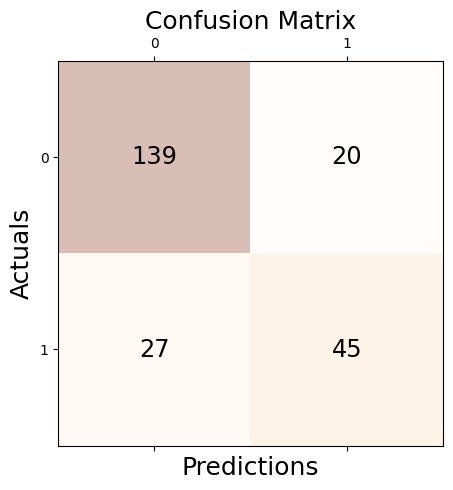

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
precision_score(test_y, prediction, average=None)

array([0.8373494 , 0.69230769])

In [ ]:
recall_score(test_y, prediction, average=None)

array([0.87421384, 0.625     ])

In [ ]:
f1_score(test_y, prediction, average=None)

array([0.85538462, 0.65693431])